## lib

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##dataset

In [116]:
df = pd.read_csv('Iris.csv')

In [117]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [118]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [120]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Distribution of features(x) and species(y)

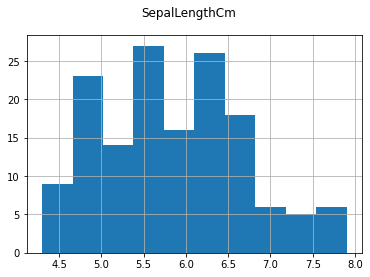

In [121]:
df["SepalLengthCm"].hist()
plt.suptitle("SepalLengthCm")
plt.show()

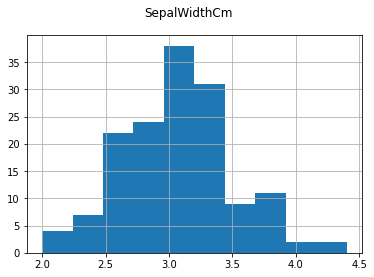

In [122]:
df["SepalWidthCm"].hist()
plt.suptitle("SepalWidthCm")
plt.show()

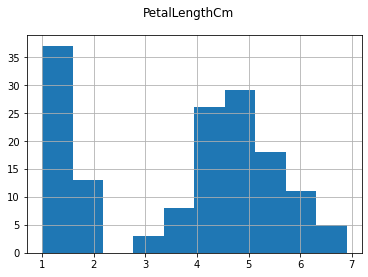

In [123]:
df["PetalLengthCm"].hist()
plt.suptitle("PetalLengthCm")
plt.show()

## one hot encoding

In [124]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
df['Species_copy'] = df['Species'] 
df['Species_copy'] = le.fit_transform(df['Species_copy']) 


# relationship of data features(x) with species (y)

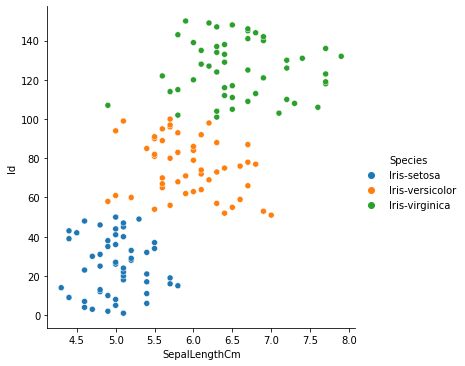

In [125]:
sns.relplot(x="SepalLengthCm", y="Id", hue= "Species" , data = df)

Text(0.5, 1.05, 'SepalLengthCm')

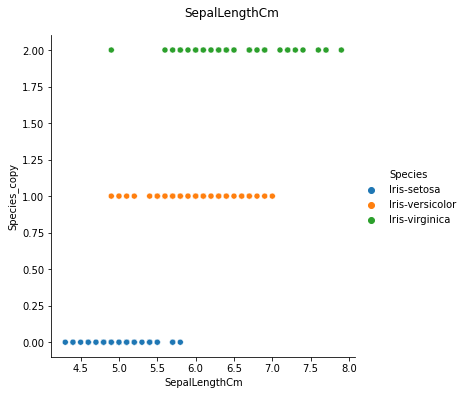

In [126]:
sns.relplot(x="SepalLengthCm", y="Species_copy", hue= "Species" , data = df)
plt.suptitle("SepalLengthCm", y=1.05)


Text(0.5, 1.05, 'SepalWidthCm')

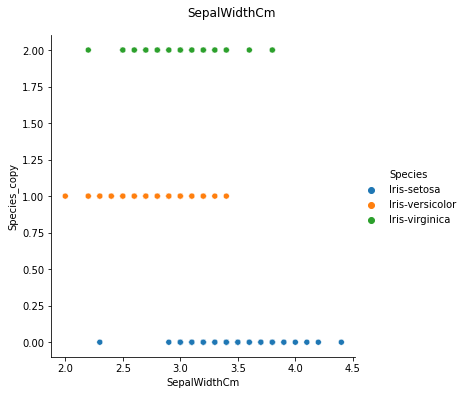

In [127]:
sns.relplot(x="SepalWidthCm", y="Species_copy", hue= "Species" , data = df)
plt.suptitle("SepalWidthCm", y=1.05)


Text(0.5, 1.05, 'PetalLengthCm')

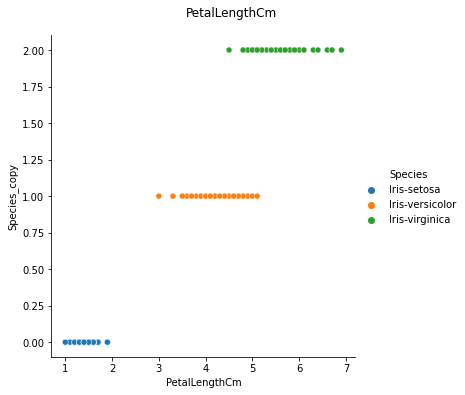

In [128]:
sns.relplot(x="PetalLengthCm", y="Species_copy", hue= "Species" , data = df)
plt.suptitle("PetalLengthCm", y=1.05)


# Exploratory data anaysis - pairplots(EDA)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


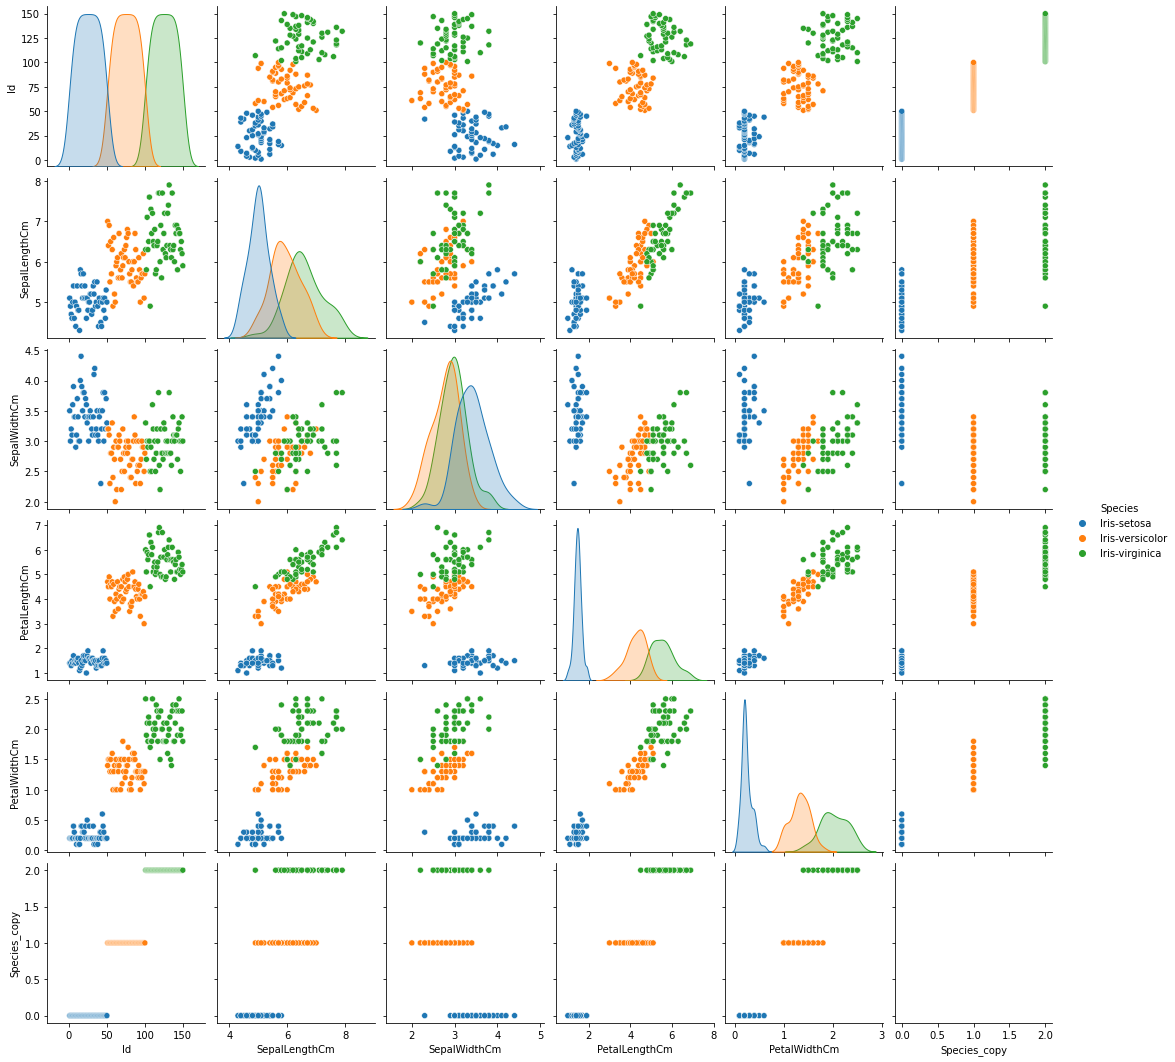

In [129]:
sns.pairplot(df, hue="Species")

## train test split

In [130]:
#x = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

In [131]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df, test_size = 0.25)

In [132]:
df_train.shape

(112, 7)

In [133]:
df_test.shape

(38, 7)

In [134]:
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_copy
93,94,5.0,2.3,3.3,1.0,Iris-versicolor,1
72,73,6.3,2.5,4.9,1.5,Iris-versicolor,1
20,21,5.4,3.4,1.7,0.2,Iris-setosa,0
25,26,5.0,3.0,1.6,0.2,Iris-setosa,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2


## data modeling

In [135]:
x_train = df_train.drop(columns=["Species", "Species_copy"]).values
y_train = df_train["Species_copy"].values

In [136]:
y_train

array([1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0,
       0, 2])

### simple manual mode - modeling

In [137]:
def single_feature_pred(petal_length):
  """Predicts the iris species given the petal length"""
  if petal_length < 2.5:
    return 0
  elif petal_length < 4.8:
    return 1
  else:
    return 2

[single_feature_pred(val) for val in x_train[:,2]manual_y_predictions = ]

In [138]:
x_train[:,3]

array([3.3, 4.9, 1.7, 1.6, 5. , 1.5, 1.5, 4.7, 1.4, 5.6, 1.9, 5.5, 1.6,
       1.5, 6.7, 6. , 4.4, 5.1, 1.4, 4.6, 1.4, 4.1, 4.4, 1.5, 4.5, 4. ,
       6.6, 5.2, 3.3, 5.2, 5.7, 1.3, 1.5, 6.1, 4.9, 5.1, 5.6, 4.1, 1.6,
       1.4, 4. , 1.3, 6.7, 3.9, 4.1, 3.8, 1.7, 1.5, 5.5, 4.4, 3.9, 5.8,
       1.5, 4.5, 5.1, 4.2, 1.5, 5.4, 1.3, 1. , 4. , 1.3, 5.7, 1.4, 4.4,
       4.8, 4.7, 6.9, 3.5, 5.8, 1.6, 4. , 1.5, 4.7, 4.5, 5.6, 4.9, 4.5,
       5.5, 4.6, 5.3, 4.2, 5.6, 1.2, 1.6, 5.1, 3.9, 4.6, 1.4, 5.1, 5.9,
       1.6, 4. , 3. , 1.4, 5.3, 1.4, 5.8, 3.6, 4.5, 6.1, 1.5, 5.1, 5.1,
       1.4, 1.4, 1.3, 5.6, 4.9, 1.7, 1.1, 5. ])

In [139]:
manual_y_pred = [single_feature_pred(val) for val in x_train[:,3]]

In [140]:
manual_y_pred == y_train

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True])

In [141]:
np.mean(manual_y_pred == y_train)

0.9553571428571429

In [142]:
accuracy = np.mean(manual_y_pred == y_train)

In [143]:
print(f"Manual model accuracy: {accuracy * 100:.2f}%")

Manual model accuracy: 95.54%
